# Part 1: Anna

In [6]:
import sympy as sym
from sympy.solvers.solveset import nonlinsolve
import numpy as np
from scipy.integrate import ode
import matplotlib.pyplot as plt

## Introduction and Background
This project focuses on using epidemic models to explore various aspects of python. Even though Alex and I worked together on this project, we focused on different implementations and features of python. The primary focus of my portion of the project was to explore the python library SymPy through the lens of stability and equilibrium analysis of epidemic models. The second part of the project I worked on looked at modifying the SIR.py code given in class to accommodate simulations where there is a parameter change during a run. Since this project relies on epidemic models and modeling we will start with a brief overview of mathematical epidemic modeling and the specific models used in this project.

There are many different variants of mathematical epidemic models which all serve the same purpose, to track and predict disease spread in a community. Some of the most common models are the susceptible-infectious-recovered (SIR), susceptible-infectious-susceptible (SIS), susceptible-infected (SI), or susceptible-exposed-infectious (SEI). These models work by dividing a population into classes, where the specific classes depend on the disease you are studying and which model is used. For example, a SIS model divides a population into a susceptible class and an infectious class, while a SEI model divides the population into a susceptible class, exposed class, and infected class. Even though the exact classes vary between models, all mathematical epidemic models have a susceptible class and an infectious class. The susceptible class, denoted by $S$, is defined to be the group of individuals who are not infected with the disease, but are susceptible to infection and the infectious class, denoted by $I$, are the individuals who are not only infected with the disease, but are capable of transmitting it to others in the population. Another important aspect to these models is movement. The most basic way for movement between the classes to happen in these models are from interactions between the classes or interaction with the disease. Thus, when the infectious and susceptible classes come into contact there is the possibility of transmission, so those who contract the disease would moved from the susceptible class to the infected class.

Mathematically, epidemic models are described as a dynamical system, often built by ordinary differential equations (ODEs); although some more complicated models can include partial differential equations (PDEs). For this project we are only using are ODE models. Once these models are described mathematically many kinds of analysis that can be preformed. In the  681Project\_SymPy\_Sisk.py code I use python to explore equilibrium and stability analysis, along with calculating the basic reproductive number, $\mathscr{R}_0$. Briefly (and simplistically), equilibrium and stability analysis looks at the long term behavior of the system and the basic reproductive number is the number of secondary infections caused by one infectious individual. Mathematically, $\mathscr{R}_0$ tells us if the differential equation describing the $I$ class will be positive or negative. In other words, if the population of the infected class is increasing or decreasing. It also has the condition, if $\mathscr{R}_0>1$ then the disease will persist in the population and if $\mathscr{R}_0<1$, the disease will eventually be eliminated. 

In my portion of the project I look at three different epidemic models. Model 1 in the 681Project\_ SymPy\_Sisk.py code comes from chapter 6, page 273 of Linda Allen's book, *An Introduction to Mathematical Biology*. It is a simple SIS model that does not allow for births and deaths, where $N$ is the total population, $\gamma$ is the recovery rate, and $\beta$ is the contact rate. While model 1, seen below, is a general model, Allen notes that models of this form are often used to study the spread of sexually transmitted diseases since no immunity is gained after recovery.

\begin{equation}
\begin{split}
    \frac{dS}{dt}&=-\frac{\beta}{N}SI+\gamma I\\
    \frac{dI}{dt}&=\frac{\beta}{N}SI-\gamma I
\end{split}
\end{equation}

Model 2 in the 681Project\_SymPy\_Sisk.py code, seen below, is from chapter 2, page 35 of Fred Brauer and Carlos Castillo-Chavez's book, *Mathematical Models for Communicable diseases*.
\begin{equation}
\begin{split}
    S'&=\lambda-\beta SI-\mu S\\
    I'&=\beta SI-\mu I-\alpha I\\
    N'&=\lambda-\mu N
\end{split}
\end{equation}
This is a general SI model, where $N$ is the total population, $\alpha$ is the rate of departure from the infective class through recovery, $\beta$ is the per-capita contact, $\mu$ is the proportional natural death rate, and $\lambda$ is the density-dependent birth rate. Unlike model 1, this model allows for births and death, but no deaths caused by the disease. It also assumes everyone is born susceptible and there is full immunity after recovery. Further, the authors then note that since the model is asymptotically autonomous we can consider $N$ to be constant and perform analysis on the follow system instead,
\begin{equation}\label{BCModelRed}
\begin{split}
    S'&=\lambda-\beta SI-\mu S\\
    I'&=\beta SI-\mu I-\alpha I.\\
\end{split}
\end{equation}
This reduced system is used in the 681Project\_SymPy\_Sisk.py.

The last model I looked at is an SEIR model from Hem Joshi, Suzanne Lenhart, Micheal Li, and Liancheng Wang's paper *Optimal Control Methods Applies to Disease Models*. I used this model in the 681Project\_NumSim\_Sisk.py code as a part of the modification the SIR.py code. The model,
\begin{equation}
\begin{split}
    S'&=bN-dS-\frac{\beta IS}{N}-vS\\
    E'&=\frac{\beta IS}{N}-(\epsilon+d)E\\
    I'&=\epsilon E-(\gamma+\alpha+d)I\\
    R'&=\gamma I-dR+vS\\
    N'&=(b-d)N-\alpha I
\end{split}
\end{equation}
is designed to study a micro-parasitic infectious disease, where $\alpha$ is the death rate caused by the disease, $b$ is the natural birth rate, $\beta$ is the adequate contact rate between susceptible and infectious individuals, $d$ is the natural death rate, $\epsilon$ is the rate exposed individuals become infectious, $\gamma$ is the recovery rate, and $v$ is the constant per capita vaccination rate. This model is more complicated then models 1 and 2 since they disease requires an incubation period in the host before they become infectious (able to transmit the disease to other). This is seen by the inclusion of the exposed class. For my part of the project I am assuming a constant vaccination rate in this model even though the main focus of the paper is to find the optimal vaccination rate using optimal control techniques. Alex will go into the detail of the optimal control problem and implementation in python in her section of the project.

Now that we have some background on mathematical epidemic modeling and the particular models we are working with we will go through a brief introduction into the SymPy library. SymPy is python's symbolic library. According to the SymPy website the aim is "to become a full-featured computer algebra system (CAS) while keeping the code as simple as possible in order to be comprehensible and easily extensible". Since SymPy is is written entirely in python, once a user has gained familiarity python's syntax SymPy is relatively easy to learn how to use and a great alternative to other symbolic mathematical programs like Maple and Mathematica, where the user would need to learn a new syntax. SymPy has a wide range of features and modules ranging from basic algebraic manipulation and simplification of symbolic expressions up to more complicated tasks like solving ODEs/PDEs and computations on symbolic matrices. To get famariliar with the basic of SymPy, let's look at some examples. 

We will start with some simple expression manipulation. Note, unlike in other CAS programs (like Maple) the user must first initialize the symbols that will be used.

In [7]:
x = sym.Symbol('x')
y = sym.Symbol('y')

Now that we have initalized the $x$ and $y$ symbols we can use them in a symbolic expression. The command pprint, short for pretty print, formats symbolic expressions (which is unnecessary in a Jupyter Notebook enviroment) and the command expand foils out the expression, as expected.

In [8]:
sym.pprint((x+y)**2)
sym.expand((x+y)**2)

       2
(x + y) 


x**2 + 2*x*y + y**2

Going one step further we can use solve command to find solutions to sybolic expressions. Note, the solve command is used to find roots and thus only requires the non-zero side of the equation.

In [9]:
sym.solve((x+y)**2,x)

[-y]

Now that we have seen some of the basic functions of SymPy, let's look at look at a more sophisticated feature-solving an ODE. While SymPy can handle ODE and PDE systems, in this example we will look at the differential equation for exponential growth. First, we define the symbolic function, $P(x)$, similar to how we defined other symbols, and then define $r$, the intrinsic growth, as before. Like the the solve command, dsolve requires the differential equation to be set equal to zero. Hence, we rearrange the differential equation as follows,
\begin{equation}
\begin{split}
    P'&=rP\\
    \implies P'-rP&=0
\end{split}
\end{equation}
and pass dsolve the left hand side.

In [10]:
P = sym.symbols('P', cls=sym.Function)
r = sym.Symbol('r')
sym.dsolve(P(x).diff(x)-r*P(x))

Eq(P(x), C1*exp(r*x))

While SymPy is able to solve various different types of ODEs and PDEs, there is a limit to the complexity it can handle. In addition to differential equations, SymPy also has modules dedicated to differential geometry, Lie algebra, category theory, logical and boolean expressions, and tensor operations to name a few. A full list of the modules and features of the SymPy library can be found on it's documentation page. For the 681Project\_SymPy\_Sisk.py code I explore the utility of the symbolic solvers, print formatting, and the ODE and linear algebra modules. Now that we have some background information we can eplore the 681Project\_ SymPy\_Sisk.py and 681Project\_NumSim\_Sisk.py codes.

## Methods and Results
We will start with looking at the 681Project\_ SymPy\_Sisk.py code. I decided to use functional programming for this code, so I could look at more then one model. This code has three functions: eq_points, stability, and NextGen. All of these functions were built to preform basic equilibrium and stability analysis that, while usually can be done by hand, is often algebraically tedious.

The first function we will look at is eq_points. As the name sugests this function returns the equilibrium points of a model/system. The arguments for the function are the system itself and a list of the state variables, so the solver knows for which symbols it is solving.

In [11]:
def eq_points(system,state_var):
    eq_pts = list(nonlinsolve(system, state_var))
    return eq_pts

The functions passes its arugments into the SymPy nonlinsolve command and it catches the outputs in a list. The list is then named eq_pts and is passed back to the user. 

The next function is named stability. This function helps a user determine if an equilibrium point is stable/unstable using traditional linearization techniques. Similar the eq_pts function, the arugments for stability are the system, the state variables, and the equilibrium point of interest. This function used the linear algebra/matrix module from SymPy.

In [22]:
def stability(system,state_var,eq):
    #Find the jacobian
    X = sym.Matrix(system) 
    Y = sym.Matrix(state_var)   
    jacobian = X.jacobian(Y)

    #Evaluate Jacobian at equilibrium point
    jacobian_eq = jacobian
    for i in range(len(state_var)):
        jacobian_eq = jacobian_eq.subs(state_var[i],eq[i])
    
    #Find the eigenvalues of the jacobian evaluated at equilibrium point
    eigenval = []
    for i in jacobian_eq.eigenvals():
        eigenval.append(i)
    for i in range(len(eigenval)):
        if eigenval[i]==0:
            warning="Stability cannot be determine due to zero eigenvalue!"
            zeoeig=True
            break
        else:
            zeoeig=False
    if zeoeig==True:
        return warning
    else:
        return eigenval

This function starts by putting the equations from the system and the state variables into seperate matrices of the same size. Then using SymPy's jacobian function, creates the jacobian matrix by passing the system and state variable matrices. The next step is to evaluate the jacobian at the given equilibrium point. To do this I set up a for-loop to run for the number of state variables and substituted in the equilibrium point value into the matrix for each state variable. We then used the eigenvals command to find the eigenvalues of the jacobian evaluated at the equilibrium point, which was put into a list. Since stability can only be determined using linearization when there non-zero eigenvalues, the last for-loop in the function checks each eigenvalue to see if it is zero. If there is zero eigenvalue, it will automatically return a warning to the user that stability is unable to be determined using linearization techniques. If there are no zero eigenvalues, then the functions returns the list of the eigenvalues. Since the eigenvalues are purely symbolic the user then must decide if the eigenvalues are positive or negative and thus whether the equilibrium point is stable or unstable.

The last function in this code in NextGen. This function uses the technique of finding the next generation matrix to calculate the basic reproductive number. Setting up the next generation matrix requires dividing your model between the infected classes, $X$, and the non-infected classes, $Y$. The infected classes include not only the infectious class, but also any exposed or carrier classes. For this process, transmissability is not needed to be consided 'infected'. Using Model 1 as an example, $X=I$ and $Y=S$ is the non-infected class. Now that the model is divided, the terms in the infected class(es) must be subdivided into terms that signify new infections (in flow rates to $X$ from $Y$), called $f$, and all other rates, called $v$. Thus the infected class(es), can be written as,
\begin{align*}
\frac{dX}{dt}=f-v.
\end{align*}
For Model 1, $f=\frac{\beta}{N}SI$ and $v=-\gamma I$. Next, for $f$ and $v$ find the derivative or take the jacobian (depending on how many state variables are in the infected classes) with respect to the state variable(es) of the infected class(es) and evaluate at the diease free equilibrium. We will refer to these modified $f$ and $v$ and $F$ and $V$, repectively. For Model 1, $F= \frac{\beta}{N}S^*$ and $V= -\gamma$. where $S^*$ is the $S$ value of the disease free equilibrium point. With $F$ and $V$, the next generation matrix can be defined as $FV^{-1}$. Now that we have the next generation matrix, we can find it's eigenvalues and the largest one, also called the spectral radius, is the basic reproductive number. So, for Model 1,
\begin{align*}
FV^{-1}&=\frac{\beta}{N}S^*\Big(-\frac{1}{\gamma}\Big)\\
&=-\frac{\beta\gamma S^*}{N}
\end{align*}
Thus, the basic reproductive number for Model 1 is $-\frac{\beta\gamma S^*}{N}$. This explanation was based on slides from B. Song at Montclair State University (https://mtbi.asu.edu/sites/default/files/brn_mtbi_2016.pdf).

The Nextgen function follows the exact process outlined above. The arguments it requires are a list of the infected state variables ($X$ from above), the list of all the state variables from the model, the in flow rates ($f$), the other rates ($v$), and the disease free equilibrium. Since the eigenvalues are purely symbolic, python cannot determine which is the largest, so it returns all of the eigenvalues of the next generation matrix. The user must decide which is the largest, and hence the basic reproductive number.

In [13]:
def NextGen(InfectVar,state_var,InFlow,OFlow,DFE):
    f=sym.Matrix(InFlow)
    v=sym.Matrix(OFlow)

    F=f.jacobian(InfectVar)
    V=v.jacobian(InfectVar)

    for i in range(len(InfectVar)):
        F=F.subs(state_var[i],DFE[i])

    for i in range(len(InfectVar)):
        V=V.subs(state_var[i],DFE[i])   
    InverseV=sym.Inverse(V)
    NextGen=F*InverseV
    return NextGen.eigenvals()

Now that we are familiar with the functions in the 681Project\_ SymPy\_Sisk.py code we can apply them to Models 1 and 2. First, we will work with 

In [14]:
#Model 1
#State variables
S = sym.Symbol('S')
I = sym.Symbol('I')
state_var = [S,I]
#Parameters
b = sym.Symbol('b')
g = sym.Symbol('g')
N = sym.Symbol('N')
#Model definition
Sdot = (-b/N)*S*I+g*I
Idot = (b/N)*S*I-g*I
system = [Sdot,Idot]

In [23]:
eq = eq_points(system,state_var)
stability = stability(system,state_var,eq[0])
basic_repro = NextGen([I],state_var,[(b/N)*S*I],[g*I],eq[0])
sym.pprint('The equilibrium points are {}'.format(eq))
sym.pprint('Stability of the equilibrium: {}'.format(stability))
print('The basic reproductive number is' )
for x in basic_repro:
    print('{}'.format(x))

The equilibrium points are [(S, 0), (N*g/b, I)]
Stability of the equilibrium: Stability cannot be determine due to zero eigenv
alue!
The basic reproductive number is
S*b/(N*g)


## Discussion and Conclusion
What I learned/What I struggled with/What was interesting and helpful/Why this could be useful to other students

# Part 2: Alex

## Introduction and Background
This project centers around the micro-parasitic infectious disease. This epidemic model will be examined in various ways using python. Anna and I will take this model and use different aspects of python to explore a new library and a new technique. For my portion of the project, I will focus on solving two optimal control problems using the Forward-Backward Sweep. The first problem will be a simple optimal control problem subject to an ordinary differential equation. The second will be an optimal control problem subject to the micro-parasitic infectious disease epidemic model. I will not go into much detail about epidemic models,since Anna has already gone through some background in Part1. I will instead start with a short but sweet overview of optimal control theory and the Forward-Backward Sweep.

The micro-parasitic infectious disease, taken from the paper "Optimal Control Methods Applied to Disease Models", is an epidemic where everyone is born susceptible and permanent immunity from the disease can be achieved through natural recovery or immunization. To model this epidemic we will use the following SEIR (or SEIRN) model [[2]](#reference_2):
\begin{align*}
& S' = bN - dS - \frac{\beta IS}{N} - uS\\
& E' = \frac{\beta IS}{N} - (\epsilon +d)E\\
& I' = \epsilon E - (\gamma +\alpha +d)I\\
& R' = \gamma I - dR + uS\\
& N' = (b-d)N - \alpha I
\end{align*}

For simplicity the Greek letters were replaced with letters from the English alphabet. Also, note that since $\frac{\beta}{N}$ is a constant, it is replaced by c. So we see that[[3]](#reference_3):
\begin{align*}
& S' = bN - dS -cSI - uS\\
& E' = cSI - (e+d)E\\
& I' = eE - (g+a+d)I\\
& R' = gI - dR + uS\\
& N' = (b-d)N - aI
\end{align*}


In epidemic models [[1]](#reference_1) [[3]](#reference_3), $S$ is defined as the susceptible individuals(these are individuals who are not yet infected but could be), $E$ is defined as the exposed individuals (these are individuals who are exposed to the disease), $I$ is defined ad the infected individuals (these are the individuals who are infectious), $R$ is defined as the recovered individual (these are the individuals who were able to recover from the disease), and $N$ is the total number of people in the population. Thus, $N = S+E+I+R$.

In our SEIR model,the natural birth rate is $b$ and the natural death rate is $d$. The term $cSI$ represents the number of infections caused by the infected. The rate at which exposed individuals become infected is $e$. So, $\frac{1}{e}$ is the mean latent or exposed period. The rate at which infected individuals recover is $g$. Thus, $\frac{1}{g}$ is the mean infectious period. Lastly, $a$ is the death rate caused by the disease [[2]](#reference_2)[[3]](#reference_3). We will use an optimal control technique to find the vaccination schedule of susceptible individual per unit of time for the micro-parasitic infectious disease. But before we go any further we need a little overview of optimal control theory.







<img src="MA681_SEIR_Model.png" alt="SEIR Model" width="600"/>

<b>Figure 1: </b> This is a flow chart of our SEIR model. The boxes represent the four types of individuals. The arrows show the movement between boxes.



### Optimal Control
The mathematical theory behind adjusting controls in a system to achieve a goal is called optimal control. It is used to make decisions involving complex biological situations. The SEIR model is a system of Ordinary Differential Equations. A few things to note about the control of Ordinary Differential Equations: $u(t)$ represents the control which is used to steer the state, the state  is $x(t)$ which describes the behavior of the underlying dynamical system. In short, the state function satisfies the differential equation while the control affects the DE. $x'(t)$ is our DE, $u(t)^*$ is the optimal control, $x(t)^*$ is the optimal state, and $u(t)^*, x(t)^*$, our optimal pair,  will help us reach our goal, the objective functional. Note that the optimal control $u^\ast(t)$ achieves the maximum. We put $u^\ast(t)$ into the state DE to obtain $x^\ast(t)$[[3]](#reference_3).

Formulating an optimal control consist of finding the piece-wise continuous control $u(t)$ and associated state variable $x(t)$ to maximize the objective function which is subject to a DE where $x(0)=x_0$, $x(T))$ is free (unrestricted), and f and g are continuously differentiable functions[[3]](#reference_3), i.e
\begin{align*}
\max \int_0^T f(t, x(t), u(t)) \, dt
\end{align*}
subject to
\begin{align*}
x'(t) = g(t, x(t), u(t))
\end{align*}
$x(0) = x_0$  and  $x(T) free $

Also, note that the maximum length is the upper bound T on the time interval. It is  assumed that all lengths go from $0$ to the maximum length. 

Given existence of an optimal control, Pontryagin's Maximum  Principle gives the necessary conditions that an optimal control must satisfy[[3]](#reference_3). Necessary conditions are generated from the Hamiltonian: <br> $H(t, x, u, \lambda) = \text{integrand  } + \text{  (adjoint) (RHS of DE)} = f(t, x, u) + \lambda g(t, x, u)$.

Each $H$ is maximized w.r.t. $u$ at $u^\ast$. The necessary conditions are
\begin{align*}
& \frac{\partial H}{\partial u} = 0 \Rightarrow f_u + \lambda g_u = 0 
\quad \text{ optimality eq.} \\
& \lambda' = - \frac{\partial H}{\partial x} \Rightarrow \lambda' = - \left( f_x + \lambda g_x \right) 
\quad \text{ adjoint eq.} \\
& \lambda (T) = 0 \quad \text{transversality condition}
\end{align*}

The optimal control problem for the SEIR model minimizes the infected individuals and the cost of the control as shown below.
\begin{align*}
\max \int_0^T  AI(t)+u(t)^2 \, dt
\end{align*}
subject to
\begin{align*}
& S' = bN - dS -cSI - uS, \,\, S(0)=S_0 \geq 0, \\
& E' = cSI - (e+d)E, \,\, E(0)=E_0 \geq 0, \\
& I' = eE - (g+a+d)I, \,\, I(0)=I_0 \geq 0, \\
& R' = gI - dR + uS, \,\, R(0)=R_0 \geq 0, \\
& N' = (b-d)N - aI, \,\, N(0)=N_0 \geq 0, \\
& 0 \leq u(t) \leq 0.9.
\end{align*}

The control, $u(t)$, is the percentage of susceptible individuals vaccinated per unit of time The control is bounded above by $0.9$ and below by $0$ since it is impossible to vaccinate the entire susceptible population [[2]](#reference_3)[[2]](#reference_3). As stated above an optimal control technique is needed to find this vaccination schedule. This technique is called the Forward-Backward Sweep.


### Forward-Backward Sweep
Before we move forward there are a few definitions we need to know. The characterization of the optimal control is the formula of $u^\ast$ that is solvable in terms of $x^\ast$ and $\lambda$. The optimality system is the  state equations and the adjoint equations together with the characterization  of the optimal control and the boundary conditions. The Forward-Backward Sweep is a method used to solve an optimal control problem numerically. It is an algorithm that will generate an approximation to the optimality system[[4]](#reference_4).

The Forward-Backward Sweep algorith consists of five steps[[3]](#reference_3):

><b>Step 1:</b> Make an initial guess for $\overrightarrow{u}$ over the interval.   
><b>Step 2:</b> Using the initial condition $x_0 =x(0)$ and the values for $\overrightarrow{u}$, solve $\overrightarrow{x}$ forward in time according to its differential equation in the optimality system.  
><b>Step 3:</b> Using the transversality condition $\lambda_{N+1}=\lambda(T)=0$ and the values for $\overrightarrow{u}$ and     $\overrightarrow{x}$, solve $\overrightarrow{\lambda}$ backward in time according to its differential equation in               the optimality system. <br>
><b>Step 4:</b> Update $\overrightarrow{u}$ by entering the new $\overrightarrow{x}$ and $\overrightarrow{\lambda}$  values into the characterization of the optimal control. Average this control with the old control from the previous iteration. <br>
><b>Step 5:</b> Check convergence. If values of the variables in this iteration and the last iteration are negligibly close, output the current values as solutions. If values are not close, return to Step 2.



In Step $2$, we know to solve $\overrightarrow{x}$ forward in time because the initial condition for x is x(0). This means x will start at the beginning of the time interval and move forward to T. In Step $3$, we know to solve $\overrightarrow{\lambda}$ backwards in time because the initial condition of $\lambda$ is $\lambda(T)$. This means that $\lambda$ will start at the end of the time interval and move backwards towards $0$. In steps $2$ and $3$, any standard ODE solver can be used like dopri5 for python. For our purpose we will use Runge-Kutta 4 sweep for ODEs. We will look more into Runge-Kutta 4 sweep in the examples below.

In Step $5$, a convergence test is required. Often in convergence test it's required that $\parallel \overrightarrow{u}-\overrightarrow{oldu} \parallel = \sum_{i=1}^{N+1} |u_i - oldu_i|$ to be small. Here $\overrightarrow{u}$ is the vector of estimated values of the control during the current iteration, and $\overrightarrow{oldu}$ is the vector of estimated values from the previous iteration. Here $\parallel \cdot \parallel$ refers to the $\ell^1$ norm for vectors. For our purpose we require a slightly stricter convergence test. We require the relative error to be negligibly small, i.e, $\frac{\parallel\overrightarrow{u}-\overrightarrow{oldu} \parallel}{\parallel \overrightarrow{u} \parallel} \leq \delta$ where $\delta$ is the accepted tolerance. We must allow for zero control. So, we will rewrite our equation so that $\parallel \overrightarrow{u} \parallel$ is no longer in the denominator. So we see that $\delta \parallel \overrightarrow{u} \parallel - \parallel \overrightarrow{u}-\overrightarrow{oldu} \parallel \geq 0$ which implies that $\delta \sum_{i=1}^{N+1} |u_i| - \sum_{i=1}^{N+1} |u_i -oldu_i| \geq 0$ [[3]](#reference_3).


## Forward-Backward Sweep of a Basic Optimal Control Problem
To test the basics of the Forward-Backward Sweep, we will look at a basic optimal control problem [[3]](#reference_3). 
\begin{align*}
\max \int_0^1  Ax(t)-Bu(t)^2 \, dt
\end{align*}
subject to
\begin{align*}
x'(t) = -\frac{1}{2}x(t)^2 + Cu(t), \,\, x(0)=x_0=1, \\
\end{align*}
$A>0, B>0,C>0$ 

In this problem our goal is to find the control $u^\ast(t)$ which maximizes the functional. We will maximize the state $Ax(t))$ while minimizing the control $(-Bu(t)^2)$ on the time length from $0$ to $1$. A is the coefficient of the state. As A increases more emphasise is put on the state. B is the cost coefficient of the control. As B increases the control decreases. In the DE $-\frac{1}{2}x(t)^2$ pulls it down while positive $Cu$ pushes it upward, where C and u are positive. The necessary conditions for this problem are 

<b>Hamiltonian:</b> 
\begin{align*}
        H=Ax-Bu^2- \frac{1}{2}\lambda x^2 + C \lambda u
    \end{align*}
    <b>Optimality condition:</b>
    \begin{align*}
        0= \frac{\partial H}{\partial u}=-2Bu+C \lambda \Rightarrow u^\ast =\frac{C \lambda}{2B}
    \end{align*}
   <b>Adjoint equation:</b>
    \begin{align*}
        \lambda'(t) =-\frac{\partial H}{\partial x} =-A +x \lambda
    \end{align*}
   <b>Transversality condition:</b>
    \begin{align*}
        \lambda (1) = 0
    \end{align*}
    

### Code Explanation:
```python
N = 1000
t = np.linspace(0,1,N+1) 
def OC_F_B_Sweep(A,B,C):    
 test = -1
 x0 = 1   
 delta = 0.001  
 h = 1/N     
 h2 = h/2
 u = np.zeros(N+1)     
 x = np.zeros(N+1)  
 x[0] = x0     
 Lambda = np.zeros(N+1)
 while(test < 0):
```


```python
  oldu = u
  oldx = x
  oldLambda = Lambda
```




```python
  for i in np.arange (0,N):
           k1 = -0.5*x[i]**2 + C*u[i]
           k2 = -0.5*(x[i] + h2*k1)**2 + C*0.5*(u[i] + u[i+1])
           k3 = -0.5*(x[i] + h2*k2)**2 + C*0.5*(u[i] + u[i+1])
           k4 = -0.5*(x[i] + h*k3)**2 + C*u[i+1]
           x[i+1] = x[i] + (h/6)*(k1 + 2*k2 +2*k3 +k4)   
```




```python
  for i in np.arange (0,N):
           j = N + 2 - (i+2)
           k1 = -A + Lambda[j]*x[j]
           k2 = -A + (Lambda[j] - h2*k1)*0.5*(x[j]+x[j-1])
           k3 = -A + (Lambda[j] - h2*k2)*0.5*(x[j]+x[j-1])
           k4 = -A + (Lambda[j] - h*k3)*x[j-1]
           Lambda[j-1] = Lambda[j] - (h/6)*(k1 + 2*k2 + 2*k3 +k4)
```




```python
  u1 = C*Lambda/(2*B)    
  u = 0.5*(u1 + oldu)     
  temp1 = delta*sum(abs(u)) - sum(abs(oldu - u))
  temp2 = delta*sum(abs(x)) - sum(abs(oldx - x))
  temp3 = delta*sum(abs(Lambda)) - sum(abs(oldLambda - Lambda))
  test = min(temp1, min(temp2, temp3))
```


```python
 y = [x, Lambda, u]
 return y
y1 = OC_F_B_Sweep(A = 1,B = 1,C = 4)
y2 = OC_F_B_Sweep(A = 2,B = 1,C = 4)
y3 = OC_F_B_Sweep(A = 2,B = 4,C = 4)
```



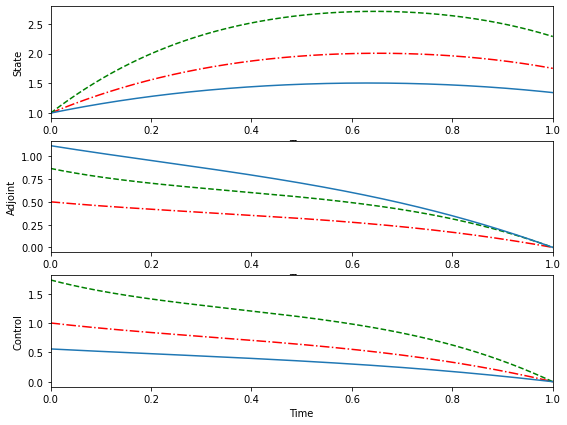

In [7]:
import numpy as np
import matplotlib.pyplot as plt

N = 1000
t = np.linspace(0,1,N+1) # Time variable

def OC_F_B_Sweep(A,B,C):

 #Test represents the convergence test variable
 test = -1
 

 x0 = 1 # Initial value of x

 delta = 0.001   # Accepted Tolerance

 h = 1/N    # Step size for Runge-Kutta 4 sweep
 h2 = h/2

 u = np.zeros(N+1)     # Initial guess for Control

 x = np.zeros(N+1)     # State
 x[0] = x0     # Stores initial value of State x.

 Lambda = np.zeros(N+1) # Adjoint

 #The while loop begins with the test function. This loop contains the Forward-Backward Sweep. The loop ends once converegence occurs (t>=0).
 while(test < 0):
    
     #Stores the current values of u, x, and lambda as the previous values of u, x, and lambda.
     oldu = u
     oldx = x
     oldLambda = Lambda

     # Generate new values. 

     #Runge-Kutta 4 sweep: Solving x forward in time. x1 is used  to find x2, x2 is used to solve x3 and so on.
     for i in np.arange (0,N):
         k1 = -0.5*x[i]**2 + C*u[i]
         k2 = -0.5*(x[i] + h2*k1)**2 + C*0.5*(u[i] + u[i+1])
         k3 = -0.5*(x[i] + h2*k2)**2 + C*0.5*(u[i] + u[i+1])
         k4 = -0.5*(x[i] + h*k3)**2 + C*u[i+1]
         x[i+1] = x[i] + (h/6)*(k1 + 2*k2 +2*k3 +k4)   
     
     #Runge-Kutta 4 sweep: Solving Lambda backwards in time. Lambda1 is used  to find Lambda2, Lambda2 is used to solve Lambda3 and so on.
     for i in np.arange (0,N):
         j = N + 2 - (i+2)
         k1 = -A + Lambda[j]*x[j]
         k2 = -A + (Lambda[j] - h2*k1)*0.5*(x[j]+x[j-1])
         k3 = -A + (Lambda[j] - h2*k2)*0.5*(x[j]+x[j-1])
         k4 = -A + (Lambda[j] - h*k3)*x[j-1]
         Lambda[j-1] = Lambda[j] - (h/6)*(k1 + 2*k2 + 2*k3 +k4)
        
    
    
     u1 = C*Lambda/(2*B)    #Represents u using the new values  for lambda
     u = 0.5*(u1 + oldu)     # Control 
    
     #Convergence test parameters of each variable.
     temp1 = delta*sum(abs(u)) - sum(abs(oldu - u))
     temp2 = delta*sum(abs(x)) - sum(abs(oldx - x))
     temp3 = delta*sum(abs(Lambda)) - sum(abs(oldLambda - Lambda))
    
     test = min(temp1, min(temp2, temp3))

 #Stores the value of the final vectors.
 y = [x, Lambda, u]
 #y[0] = x
 #y[1] = Lambda
 #y[2] = u
 return y


y1 = OC_F_B_Sweep(A = 1,B = 1,C = 4)

y2 = OC_F_B_Sweep(A = 2,B = 1,C = 4)

y3 = OC_F_B_Sweep(A = 2,B = 4,C = 4)


# Plot Results
plt.figure(figsize=(9,7))  
plt.subplot(3,1,1);plt.plot( t, y1[0], 'r-.', t, y2[0],'g--',  t, y3[0])
plt.subplot(3,1,1);plt.xlabel('Time')
plt.subplot(3,1,1);plt.ylabel('State')
plt.subplot(3,1,1);plt.xlim([0,1])

plt.subplot(3,1,2);plt.plot( t, y1[1], 'r-.', t, y2[1],'g--',  t, y3[1])
plt.subplot(3,1,2);plt.xlabel('Time')
plt.subplot(3,1,2);plt.ylabel('Adjoint')
plt.subplot(3,1,2);plt.xlim([0,1])

plt.subplot(3,1,3);plt.plot( t, y1[2], 'r-.', t, y2[2],'g--',  t, y3[2])
plt.subplot(3,1,3);plt.xlabel('Time')
plt.subplot(3,1,3);plt.ylabel('Control')   
plt.subplot(3,1,3);plt.xlim([0,1])

plt.show()

from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

import warnings
warnings.filterwarnings('ignore')

### Discussion 

## Forward-Backward Sweep of the Optimal Control Problem of the SEIR Epidemic Model

Let's recall the optimal control pronlem of the SEIR model.
\begin{align*}
\max \int_0^T  AI(t)+u(t)^2 \, dt
\end{align*}
subject to
\begin{align*}
& S' = bN - dS -cSI - uS, \,\, S(0)=S_0 \geq 0, \\
& E' = cSI - (e+d)E, \,\, E(0)=E_0 \geq 0, \\
& I' = eE - (g+a+d)I, \,\, I(0)=I_0 \geq 0, \\
& R' = gI - dR + uS, \,\, R(0)=R_0 \geq 0, \\
& N' = (b-d)N - aI, \,\, N(0)=N_0 \geq 0, \\
& 0 \leq u(t) \leq 0.9.
\end{align*}

Observe that $R$ only appears in $R'$ not $S'$, $E'$, $I'$, or $N'$. Therefore, R can be ignored when solving the optimal control using the Forward-Backward Sweep and instead be solved using it's differential equation once convergence is achieved. Before beginning the Forward-Backward Sweep, we first need the necessary conditions. 
The necessary conditions for this problem are 

<b> Hamiltonian:</b>
    \begin{align*}
        H=AI+u^2+(bN-dS-cSI-us) \lambda_1+(cSI-(e+d)E)) \lambda_2 +(eE-(g+a+d)I) \lambda_3+((b-d)N-aI) \lambda_4
    \end{align*}
    
   <b>Optimality condition:</b>
    \begin{align*}
        0= \frac{\partial H}{\partial u}=2u -S\lambda_1 \Rightarrow u^\ast =\frac{S \lambda_1}{2}
    \end{align*}
    
   <b> Adjoint equations:</b>
    \begin{align*}
       & \lambda_S'(t) =-\frac{\partial H}{\partial S} = (d+cI+u)\lambda_1 - cI\lambda_2 \\
       &\lambda_E'(t) =-\frac{\partial H}{\partial E} = (e+d) \lambda_2 - e\lambda_3\\
       & \lambda_I'(t) =-\frac{\partial H}{\partial I} =-A +(g+a+d)\lambda_3 + cS\lambda_1 -cS\lambda_2 +a\lambda_4\\
       & \lambda_N'(t) =-\frac{\partial H}{\partial N} =-(b-d)\lambda_4 - b\lambda_1\\    
    \end{align*}
    <b>Transversality condition:</b>
    \begin{align*}
        \lambda (T) = 0
    \end{align*}
    
$S$, $E$, $I$, and $N$ are solved forward in time while their adjoints are solved backwards in time.  

### Code Explanation:
```python
def OC_SEIRN(b, d, c, e, g, a, A, T, S0, E0, I0, R0, N0):
 test = -1
 delta = 0.001   
 M = 1000
 tvec = np.linspace(0,T,M+1) 
 h = 1/M    
 h2 = h/2
 u = np.zeros(M+1)     
 x = np.zeros((M+1,4)) 
 S = np.zeros(M+1)     
 E = np.zeros(M+1)     
 I = np.zeros(M+1)    
 N = np.zeros(M+1)     
 Lambda1 = np.zeros(M+1) 
 Lambda2 = np.zeros(M+1) 
 Lambda3 = np.zeros(M+1) 
 Lambda4 = np.zeros(M+1) 
 Lambda = np.zeros((M+1,4)) 
 R = np.zeros(M+1)
 S[0] = S0    
 E[0] = E0     
 I[0] = I0     
 N[0] = N0     
 while(test < 0):   
```

```python
     oldu = u
     oldx = x
     oldLambda = Lambda
```

```python
     for i in np.arange (0,M):
         k11 = b*N[i] - (d + c*I[i] + u[i])*S[i]
         k12 = c*S[i]*I[i] - (e + d)*E[i]
         k13 = e*E[i] - (g + a + d)*I[i]
         k14 = (b - d)*N[i] - a*I[i]
         k21 = b*(N[i] + h2*k14) - (d + c*(I[i] + h2*k13) + 0.5*(u[i] + u[i+1]))*(S[i] + h2*k11)
         k22 = c*(S[i] + h2*k11)*(I[i] + h2*k13) - (e + d)*(E[i] + h2*k12)
         k23 = e*(E[i] + h2*k12) - (g + a + d)*(I[i] + h2*k13)
         k24 = (b - d)*(N[i] +h2*k14) - a*(I[i] + h2*k13)
         k31 = b*(N[i] + h2*k24) - (d + c*(I[i] + h2*k23) + 0.5*(u[i] + u[i+1]))*(S[i] + h2*k21)
         k32 = c*(S[i] + h2*k21)*(I[i] + h2*k23) - (e + d)*(E[i] + h2*k22)
         k33 = e*(E[i] + h2*k22) - (g + a + d)*(I[i] + h2*k23)
         k34 = (b - d)*(N[i] +h2*k24) - a*(I[i] + h2*k23)
         k41 = b*(N[i] + h*k34) - (d + c*(I[i] + h*k33) + u[i+1])*(S[i] + h*k31)
         k42 = c*(S[i] + h*k31)*(I[i] + h*k33) - (e + d)*(E[i] + h*k32)
         k43 = e*(E[i] + h*k32) - (g + a + d)*(I[i] + h*k33)
         k44 = (b - d)*(N[i] +h*k34) - a*(I[i] + h*k33)
         S[i+1] = S[i] + (h/6)*(k11 + 2*k21 +2*k31 +k41) 
         E[i+1] = E[i] + (h/6)*(k12 + 2*k22 +2*k32 +k42) 
         I[i+1] = I[i] + (h/6)*(k13 + 2*k23 +2*k33 +k43) 
         N[i+1] = N[i] + (h/6)*(k14 + 2*k24 +2*k34 +k44)   
    
```

```python
     for i in np.arange (0,M):
         j = M + 2 - (i+2)
         k11 = (d + c + u[j])*Lambda1[j] - c*Lambda2[j]*I[j]
         k12 = (e + d)*Lambda2[j] - e*Lambda3[j]
         k13 = -A + (g + a + d)*Lambda3[j] + c*Lambda1[j]*S[j] - c*Lambda2[j]*S[j] + a*Lambda4[j]
         k14 = -(b - d)*Lambda4[j] - b*Lambda1[j]
         k21 = (d + c + 0.5*(u[j] + u[j-1]))*(Lambda1[j] - h2*k11) - c*(Lambda2[j] - h2*k12)*0.5*(I[j] + I[j-1])
         k22 = (e + d)*(Lambda2[j] - h2*k12) - e*(Lambda3[j] - h2*k13)
         k23 = -A + (g + a + d)*(Lambda3[j] - h2*k13) + c*(Lambda1[j] - h2*k11)*0.5*(S[j] + S[j-1]) - c*(Lambda2[j] -h2*k12)*0.5*(S[j] + S[j-1]) + a*(Lambda4[j] - h2*k14)
         k24 = -(b - d)*(Lambda4[j] - h2*k14) - b*(Lambda1[j] - h2*k11)
         k31 = (d + c + 0.5*(u[j] + u[j-1]))*(Lambda1[j] - h2*k21) - c*(Lambda2[j] - h2*k22)*0.5*(I[j] + I[j-1])
         k32 = (e + d)*(Lambda2[j] - h2*k22) - e*(Lambda3[j] - h2*k23)
         k33 = -A + (g + a + d)*(Lambda3[j] - h2*k23) + c*(Lambda1[j] - h2*k21)*0.5*(S[j] + S[j-1]) - c*(Lambda2[j] -h2*k22)*0.5*(S[j] + S[j-1]) + a*(Lambda4[j] - h2*k24)
         k34 = -(b - d)*(Lambda4[j] - h2*k24) - b*(Lambda1[j] - h2*k21)
         k41 = (d + c + u[j-1])*(Lambda1[j] - h*k31) - c*(Lambda2[j] - h*k32)* I[j-1]
         k42 = (e + d)*(Lambda2[j] - h*k32) - e*(Lambda3[j] - h*k33)
         k43 = -A + (g + a + d)*(Lambda3[j] - h*k33) + c*(Lambda1[j] - h*k31)*S[j-1] - c*(Lambda2[j] - h*k32)*S[j-1] + a*(Lambda4[j] - h*k34)
         k44 = -(b - d)*(Lambda4[j] - h*k34) - b*(Lambda1[j] - h*k31)
         Lambda1[j-1] = Lambda1[j] - (h/6)*(k11 + 2*k21 + 2*k31 +k41)
         Lambda2[j-1] = Lambda2[j] - (h/6)*(k12 + 2*k22 + 2*k32 +k42)
         Lambda3[j-1] = Lambda3[j] - (h/6)*(k13 + 2*k23 + 2*k33 +k43)
         Lambda4[j-1] = Lambda4[j] - (h/6)*(k14 + 2*k24 + 2*k34 +k44)
    
```

```python
     SEIN = np.array([S,E,I,N])
     x = SEIN.transpose()
     Lam1_4 = np.array([Lambda1,Lambda2,Lambda3,Lambda4])
     Lambda = Lam1_4.transpose()
     y = x[:,0]
     z = Lambda[:,0]
```


```python
     temp = (y*z)/2       
     m = np.zeros(M+1)                 
     for i in np.arange (0,M+1):
           m[i] = min(0.9, max(0,temp[i]))
           u1 =m       
           u = 0.5*(u1 + oldu)     
     temp1 = delta*LA.norm(u) - LA.norm(oldu - u)
     temp2 = delta*LA.norm(x) - LA.norm(oldx - x)
     temp3 = delta*LA.norm(Lambda) - LA.norm(oldLambda - Lambda)
     test = min(temp1, min(temp2, temp3))     
```

```python
  R = x[:,3] - x[:,1] - x[:,2] - x[:,0]
 y = [x[:,0], x[:,1], x[:,2], x[:,3], R, u, tvec]
 return y
y1 = OC_SEIRN(b = 0.525, d = 0.5, c = 0.0001, e = 0.5, g = 0.1, a = 0.2, A = 0.1, T = 20, S0 = 1000, E0 = 100, I0 = 50, R0 = 15, N0 = 1165)
y2 = OC_SEIRN(b = 0.525, d = 0.5, c = 0.001, e = 0.5, g = 0.1, a = 0.2, A = 0.1, T = 20, S0 = 1000, E0 = 100, I0 = 50, R0 = 15, N0 = 1165)
y3 = OC_SEIRN(b = 0.525, d = 0.5, c = 0.001, e = 0.5, g = 0.1, a = 0.2, A = 0.1, T = 20, S0 = 1000, E0 = 1000, I0 = 2000, R0 = 500, N0 = 1165)
y4 = OC_SEIRN(b = 0.525, d = 0.5, c = 0.001, e = 0.5, g = 0.1, a = 0.2, A = 0.1, T = 20, S0 = 1000, E0 = 2000, I0 = 5000, R0 = 1000, N0 = 1165)
```

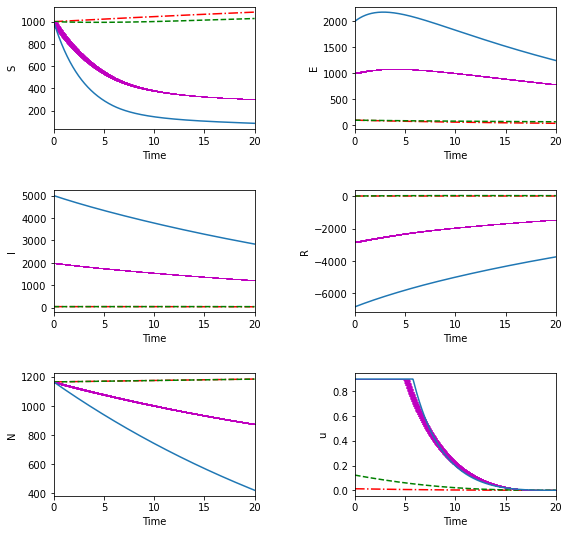

In [2]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt

def OC_SEIRN(b, d, c, e, g, a, A, T, S0, E0, I0, R0, N0):
 #Test represents the convergence test variable
 test = -1

 delta = 0.001   # Accepted Tolerance
 M = 1000

 tvec = np.linspace(0,T,M+1) # Time variable
 h = 1/M    # Step size for Runge-Kutta 4 sweep
 h2 = h/2


 u = np.zeros(M+1)     # Initial guess for Control
 x = np.zeros((M+1,4)) # State
 S = np.zeros(M+1)     # State S
 E = np.zeros(M+1)     # State E
 I = np.zeros(M+1)     # State I
 N = np.zeros(M+1)     # State N

 Lambda1 = np.zeros(M+1) # Adjoint of S
 Lambda2 = np.zeros(M+1) # Adjoint of E
 Lambda3 = np.zeros(M+1) # Adjoint of I
 Lambda4 = np.zeros(M+1) # Adjoint of N
 Lambda = np.zeros((M+1,4))  # Adjoint

 R = np.zeros(M+1)

 S[0] = S0     # Stores initial value of State S.
 E[0] = E0     # Stores initial value of State E.
 I[0] = I0     # Stores initial value of State I.
 N[0] = N0     # Stores initial value of State N.



 #The while loop begins with the test function. This loop contains the Forward-Backward Sweep. The loop ends once converegence occurs (t>=0).
 while(test < 0):
    
     #Stores the current values of u, S, E, I, N, Lambda1, Lambda2, Lambda3, Lambda4, x, and Lambda as the previous values of u, x, and lambda.
     oldu = u
     oldx = x
     oldLambda = Lambda

     # Generate new values. 

     #Runge-Kutta 4 sweep: Solving x forward in time. x1 is used  to find x2, x2 is used to solve x3 and so on.
     for i in np.arange (0,M):
         k11 = b*N[i] - (d + c*I[i] + u[i])*S[i]
         k12 = c*S[i]*I[i] - (e + d)*E[i]
         k13 = e*E[i] - (g + a + d)*I[i]
         k14 = (b - d)*N[i] - a*I[i]

         k21 = b*(N[i] + h2*k14) - (d + c*(I[i] + h2*k13) + 0.5*(u[i] + u[i+1]))*(S[i] + h2*k11)
         k22 = c*(S[i] + h2*k11)*(I[i] + h2*k13) - (e + d)*(E[i] + h2*k12)
         k23 = e*(E[i] + h2*k12) - (g + a + d)*(I[i] + h2*k13)
         k24 = (b - d)*(N[i] +h2*k14) - a*(I[i] + h2*k13)

         k31 = b*(N[i] + h2*k24) - (d + c*(I[i] + h2*k23) + 0.5*(u[i] + u[i+1]))*(S[i] + h2*k21)
         k32 = c*(S[i] + h2*k21)*(I[i] + h2*k23) - (e + d)*(E[i] + h2*k22)
         k33 = e*(E[i] + h2*k22) - (g + a + d)*(I[i] + h2*k23)
         k34 = (b - d)*(N[i] +h2*k24) - a*(I[i] + h2*k23)

         k41 = b*(N[i] + h*k34) - (d + c*(I[i] + h*k33) + u[i+1])*(S[i] + h*k31)
         k42 = c*(S[i] + h*k31)*(I[i] + h*k33) - (e + d)*(E[i] + h*k32)
         k43 = e*(E[i] + h*k32) - (g + a + d)*(I[i] + h*k33)
         k44 = (b - d)*(N[i] +h*k34) - a*(I[i] + h*k33)

         S[i+1] = S[i] + (h/6)*(k11 + 2*k21 +2*k31 +k41) 
         E[i+1] = E[i] + (h/6)*(k12 + 2*k22 +2*k32 +k42) 
         I[i+1] = I[i] + (h/6)*(k13 + 2*k23 +2*k33 +k43) 
         N[i+1] = N[i] + (h/6)*(k14 + 2*k24 +2*k34 +k44)   
    
     #Runge-Kutta 4 sweep: Solving Lambda backwards in time. Lambda1 is used  to find Lambda2, Lambda2 is used to solve Lambda3 and so on.
     for i in np.arange (0,M):
         j = M + 2 - (i+2)
         k11 = (d + c + u[j])*Lambda1[j] - c*Lambda2[j]*I[j]
         k12 = (e + d)*Lambda2[j] - e*Lambda3[j]
         k13 = -A + (g + a + d)*Lambda3[j] + c*Lambda1[j]*S[j] - c*Lambda2[j]*S[j] + a*Lambda4[j]
         k14 = -(b - d)*Lambda4[j] - b*Lambda1[j]

         k21 = (d + c + 0.5*(u[j] + u[j-1]))*(Lambda1[j] - h2*k11) - c*(Lambda2[j] - h2*k12)*0.5*(I[j] + I[j-1])
         k22 = (e + d)*(Lambda2[j] - h2*k12) - e*(Lambda3[j] - h2*k13)
         k23 = -A + (g + a + d)*(Lambda3[j] - h2*k13) + c*(Lambda1[j] - h2*k11)*0.5*(S[j] + S[j-1]) - c*(Lambda2[j] - h2*k12)*0.5*(S[j] + S[j-1]) + a*(Lambda4[j] - h2*k14)
         k24 = -(b - d)*(Lambda4[j] - h2*k14) - b*(Lambda1[j] - h2*k11)

         k31 = (d + c + 0.5*(u[j] + u[j-1]))*(Lambda1[j] - h2*k21) - c*(Lambda2[j] - h2*k22)*0.5*(I[j] + I[j-1])
         k32 = (e + d)*(Lambda2[j] - h2*k22) - e*(Lambda3[j] - h2*k23)
         k33 = -A + (g + a + d)*(Lambda3[j] - h2*k23) + c*(Lambda1[j] - h2*k21)*0.5*(S[j] + S[j-1]) - c*(Lambda2[j] - h2*k22)*0.5*(S[j] + S[j-1]) + a*(Lambda4[j] - h2*k24)
         k34 = -(b - d)*(Lambda4[j] - h2*k24) - b*(Lambda1[j] - h2*k21)

         k41 = (d + c + u[j-1])*(Lambda1[j] - h*k31) - c*(Lambda2[j] - h*k32)* I[j-1]
         k42 = (e + d)*(Lambda2[j] - h*k32) - e*(Lambda3[j] - h*k33)
         k43 = -A + (g + a + d)*(Lambda3[j] - h*k33) + c*(Lambda1[j] - h*k31)*S[j-1] - c*(Lambda2[j] - h*k32)*S[j-1] + a*(Lambda4[j] - h*k34)
         k44 = -(b - d)*(Lambda4[j] - h*k34) - b*(Lambda1[j] - h*k31)

         Lambda1[j-1] = Lambda1[j] - (h/6)*(k11 + 2*k21 + 2*k31 +k41)
         Lambda2[j-1] = Lambda2[j] - (h/6)*(k12 + 2*k22 + 2*k32 +k42)
         Lambda3[j-1] = Lambda3[j] - (h/6)*(k13 + 2*k23 + 2*k33 +k43)
         Lambda4[j-1] = Lambda4[j] - (h/6)*(k14 + 2*k24 + 2*k34 +k44)
    
     # Make SEIN and Lambda1-4 into transpose matrices
     SEIN = np.array([S,E,I,N])
     x = SEIN.transpose()
     Lam1_4 = np.array([Lambda1,Lambda2,Lambda3,Lambda4])
     Lambda = Lam1_4.transpose()


     y = x[:,0]
     z = Lambda[:,0]

     # Optimal Control
     temp = (y*z)/2       #Represents the characterization of u 


     m = np.zeros(M+1)                 #Represents u and it's bounds i.e 0<= u* <= 0.9
     for i in np.arange (0,M+1):
           m[i] = min(0.9, max(0,temp[i]))
           u1 =m       


           u = 0.5*(u1 + oldu)     # Control 
    
     #Convergence test parameters of each variable.
     temp1 = delta*LA.norm(u) - LA.norm(oldu - u)
     temp2 = delta*LA.norm(x) - LA.norm(oldx - x)
     temp3 = delta*LA.norm(Lambda) - LA.norm(oldLambda - Lambda)
    

     test = min(temp1, min(temp2, temp3))     
    


 #Solving for R where R = N - S - E - I
 R = x[:,3] - x[:,1] - x[:,2] - x[:,0]

 y = [x[:,0], x[:,1], x[:,2], x[:,3], R, u, tvec]
 return y

y1 = OC_SEIRN(b = 0.525, d = 0.5, c = 0.0001, e = 0.5, g = 0.1, a = 0.2, A = 0.1, T = 20, S0 =1000, E0 =100, I0 = 50, R0 = 15, N0 =1165)

y2 = OC_SEIRN(b = 0.525, d = 0.5, c = 0.001, e = 0.5, g = 0.1, a = 0.2, A = 0.1, T = 20, S0 =1000, E0 =100, I0 = 50, R0 = 15, N0 =1165)

y3 = OC_SEIRN(b = 0.525, d = 0.5, c = 0.001, e = 0.5, g = 0.1, a = 0.2, A = 0.1, T = 20, S0 =1000, E0 =1000, I0 = 2000, R0 = 500, N0 =1165)

y4 = OC_SEIRN(b = 0.525, d = 0.5, c = 0.001, e = 0.5, g = 0.1, a = 0.2, A = 0.1, T = 20, S0 =1000, E0 =2000, I0 = 5000, R0 = 1000, N0 =1165)


##Plot Results##
plt.figure(figsize=(9,9)) 

#plt.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=None,hspace=None)
#This is used to fix the spacing of the subplots
plt.subplots_adjust(None,None,None,None,0.5,0.5)    

plt.subplot(3,2,1);plt.plot(y1[6], y1[0], 'r-.', y2[6], y2[0],'g--', y3[6], y3[0], 'm_', y4[6], y4[0])
plt.subplot(3,2,1);plt.xlabel('Time')
plt.subplot(3,2,1);plt.ylabel('S')
plt.subplot(3,2,1);plt.xlim([0,20])


plt.subplot(3,2,2);plt.plot(y1[6], y1[1], 'r-.', y2[6], y2[1],'g--', y3[6], y3[1], 'm_', y4[6], y4[1])
plt.subplot(3,2,2);plt.xlabel('Time')
plt.subplot(3,2,2);plt.ylabel('E')
plt.subplot(3,2,2);plt.xlim([0,20])


plt.subplot(3,2,3);plt.plot(y1[6], y1[2], 'r-.', y2[6], y2[2],'g--',  y3[6], y3[2], 'm_', y4[6], y4[2])
plt.subplot(3,2,3);plt.xlabel('Time')
plt.subplot(3,2,3);plt.ylabel('I')   
plt.subplot(3,2,3);plt.xlim([0,20])


plt.subplot(3,2,4);plt.plot(y1[6], y1[4], 'r-.', y2[6], y2[4],'g--', y3[6], y3[4], 'm_', y4[6], y4[4])
plt.subplot(3,2,4);plt.xlabel('Time')
plt.subplot(3,2,4);plt.ylabel('R')
plt.subplot(3,2,4);plt.xlim([0,20])


plt.subplot(3,2,5);plt.plot(y1[6], y1[3], 'r-.', y2[6], y2[3],'g--', y3[6], y3[3], 'm_', y4[6], y4[3])
plt.subplot(3,2,5);plt.xlabel('Time')
plt.subplot(3,2,5);plt.ylabel('N')
plt.subplot(3,2,5);plt.xlim([0,20])


plt.subplot(3,2,6);plt.plot(y1[6], y1[5], 'r-.', y2[6], y2[5],'g--', y3[6], y3[5], 'm_', y4[6], y4[5])
plt.subplot(3,2,6);plt.xlabel('Time')
plt.subplot(3,2,6);plt.ylabel('u')   
plt.subplot(3,2,6);plt.xlim([0,20])


plt.show()

import warnings
warnings.filterwarnings('ignore')

### Discussion

## Conclusion

## Reference

 [1] <span style='color:Blue'>Allen,Linda J. S.</span> "An Introduction to Mathematical Biology". <span style='color:Blue'>Upper Saddle River, NJ: Pearson Education, Inc., 2007, 1-348}</span>
<a id=’reference_1’></a>

 [2] <span style='color:Blue'>Joshi,Hem Raj, Lenhart,Suzanne, Li,Michael Y., and Wang,Liancheng</span> "Optimal Control Methods Applied to Disease Models". <span style='color:Blue'>(2006), 1-21.</span>
<a id=’reference_2’></a>

 [3] <span style='color:Blue'>Lenhart,Suzanne and Workman, John T.</span> "Optimal Contol Applied to Biological Models". <span style='color:Blue'>Boca Raton, FL: Taylor Francis Group, LLC, 2007, 1-261.</span>
<a id=’reference_3’></a>

 [4] <span style='color:Blue'>Pettit,Rebecca and Lenhart,Suzanne</span> "Optimal Control of a PDE Model of an Invasive Species in a River". <span style='color:Blue'>(2019), 1-17.</span>
<a id=’reference_4’></a>

 [5] <span style='color:Blue'>Wise,Steven M. and Salgado, Abner J. </span> "Graduate Numerical Analysis: A Modern Introduction". <span style='color:Blue'>(2019), 1-710.</span>
<a id=’reference_5’></a>